<a href="https://colab.research.google.com/github/yasminemasmoudi/P2M-models/blob/master/Fix_Missing_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests
drive_path = '/content/drive/My Drive/p2mfiles/'
from bs4 import BeautifulSoup

df_books = pd.read_csv(drive_path + 'to_clean.csv')
nopic_ids = df_books[df_books.image_url.str.contains('nophoto')].book_id.values

headers = requests.utils.default_headers()
headers.update({
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0',
})
URL = 'https://www.goodreads.com/book/show/'

print(f'Total missing images : {len(nopic_ids)}')
no_images = set([389627,42155,4502877,25735012,19469, 3698,207781, 53580, 105703,63432,313620, 78674, 44360 ])
ex = 0

for i, bookid in enumerate(nopic_ids):
    if bookid in no_images:
      continue
    try:
        page = requests.get(URL + str(bookid), headers = headers)
        soup = BeautifulSoup(page.content, 'html.parser')
        new_image_url = soup.find("div", {"class": "editionCover"}).img['src']
        df_books.loc[df_books.book_id == bookid,'image_url'] = new_image_url
    except Exception as e:
        ex += 1
        print(f'No image found for Bookid : {bookid} due to {e}')
        if(ex > 5):
          print('Terminating ..')
          break
    if i and i % 100 == 0:
        print(f'Processed {i} Books')

new_nopic_ids = df_books[df_books.image_url.str.contains('nophoto')].book_id.values
print(f'Missing images now: {len(new_nopic_ids)}')
print(f'Updated {abs(len(new_nopic_ids) - len(nopic_ids))} images')
print()
print('Writing to Drive ...')
df_books.to_csv(drive_path + 'cleaned.csv', index = False)

Total missing images : 53
Missing images now: 13
Updated 40 images

Writing to Drive ...


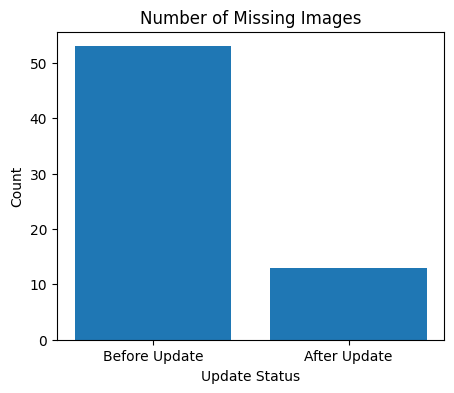

In [1]:
import matplotlib.pyplot as plt

# Calculate the number of missing images before and after the update
missing_before = 53
missing_after = 13

# Create a bar plot
plt.figure(figsize=(5, 4))
plt.bar(['Before Update', 'After Update'], [missing_before, missing_after])
plt.title('Number of Missing Images')
plt.xlabel('Update Status')
plt.ylabel('Count')
plt.show()

In [ ]:
cols = ['original_title', 'authors', 'average_rating', 'image_url', 'book_id']


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,r_index,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [ ]:
cols = [c for c in df_books.columns if not 'Unnamed' in c]
df = df_books[cols].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9274 entries, 0 to 9273
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   r_index                    9274 non-null   int64  
 1   book_id                    9274 non-null   int64  
 2   best_book_id               9274 non-null   int64  
 3   work_id                    9274 non-null   int64  
 4   books_count                9274 non-null   int64  
 5   isbn                       8728 non-null   object 
 6   isbn13                     8828 non-null   float64
 7   authors                    9274 non-null   object 
 8   original_publication_year  9268 non-null   float64
 9   original_title             9274 non-null   object 
 10  title                      9274 non-null   object 
 11  language_code              8281 non-null   object 
 12  average_rating             9274 non-null   float64
 13  ratings_count              9274 non-null   int64

In [ ]:
df.to_csv('full_books.csv', index = False)

In [ ]:
df.to_csv(drive_path + 'full_books.csv', index = False)

In [ ]:
cols = ['r_index','book_id','authors','original_title','image_url','average_rating','ratings_count']
df = df[cols]
df.to_csv('books.csv', index = False)